In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv("lexicon_approach2.csv")
df.head()

,Unnamed: 0,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,neg,neu,pos,compound
0,0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece...",ex wife threatening suicide recently left wife...,0.378,0.437,0.186,-0.9655
1,1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","['weird', 'not', 'get', 'affected', 'complimen...",weird not get affected compliment coming someo...,0.225,0.529,0.245,0.0984
2,2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ...",finally almost never hear bad year ever swear ...,0.259,0.433,0.308,0.2025
3,3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']",need help help cry hard,0.413,0.092,0.495,0.2263
4,4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'...",lost hello name adam struggling year afraid pa...,0.368,0.505,0.127,-0.9965


In [3]:
df.isnull().sum()

Unnamed: 0                          0
text                               57
class                               0
stemmed_processed_text              0
lemmatized_processed_text           0
clean_lemmatized_processed_text    95
neg                                 0
neu                                 0
pos                                 0
compound                            0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df['compound_score'] = df['compound']
df.head()

,Unnamed: 0,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,neg,neu,pos,compound,compound_score
0,0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece...",ex wife threatening suicide recently left wife...,0.378,0.437,0.186,-0.9655,-0.9655
1,1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","['weird', 'not', 'get', 'affected', 'complimen...",weird not get affected compliment coming someo...,0.225,0.529,0.245,0.0984,0.0984
2,2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ...",finally almost never hear bad year ever swear ...,0.259,0.433,0.308,0.2025,0.2025
3,3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']",need help help cry hard,0.413,0.092,0.495,0.2263,0.2263
4,4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'...",lost hello name adam struggling year afraid pa...,0.368,0.505,0.127,-0.9965,-0.9965


In [6]:
# Print the classification report and confusion matrix
y_true = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)
y_pred = df['compound_score'].apply(lambda x: 1 if x < 0 else 0) # Convert compound score to binary classification

In [7]:
print(confusion_matrix(y_true, y_pred))
print('Accuracy:', accuracy_score(y_true, y_pred))
print('F1 Score:', f1_score(y_true, y_pred))

[[74863 41099]
 [35555 80462]]
Accuracy: 0.6695649175140853
F1 Score: 0.6773522800932746


In [8]:
df['compound_score'] = np.where(df['compound'] < 0, 1, 0)
df

,Unnamed: 0,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,neg,neu,pos,compound,compound_score
0,0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece...",ex wife threatening suicide recently left wife...,0.378,0.437,0.186,-0.9655,1
1,1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","['weird', 'not', 'get', 'affected', 'complimen...",weird not get affected compliment coming someo...,0.225,0.529,0.245,0.0984,0
2,2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ...",finally almost never hear bad year ever swear ...,0.259,0.433,0.308,0.2025,0
3,3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']",need help help cry hard,0.413,0.092,0.495,0.2263,0
4,4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'...",lost hello name adam struggling year afraid pa...,0.368,0.505,0.127,-0.9965,1
...,...,...,...,...,...,...,...,...,...,...,...
232069,232069,if you do not like rock then your not going to...,non-suicide,"['not', 'like', 'rock', 'not', 'go', 'get', 'a...","['not', 'like', 'rock', 'not', 'going', 'get',...",not like rock not going get anything go http m...,0.098,0.744,0.158,0.3160,0
232070,232070,you how you can tell i have so many friends an...,non-suicide,"['tell', 'mani', 'friend', 'not', 'lone', 'eve...","['tell', 'many', 'friend', 'not', 'lonely', 'e...",tell many friend not lonely everything deprive...,0.000,0.604,0.396,0.7823,0
232071,232071,pee probably tastes like salty tea can someone...,non-suicide,"['pee', 'probabl', 'tast', 'like', 'salti', 't...","['pee', 'probably', 'taste', 'like', 'salty', ...",pee probably taste like salty tea someone dran...,0.000,0.783,0.217,0.3612,0
232072,232072,the usual stuff you find here i'm not posting ...,suicide,"['usual', 'stuff', 'find', ""'m"", 'not', 'post'...","['usual', 'stuff', 'find', ""'m"", 'not', 'posti...",usual stuff find 'm not posting sympathy pity ...,0.225,0.537,0.238,-0.0670,1


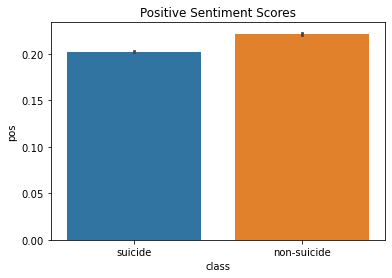

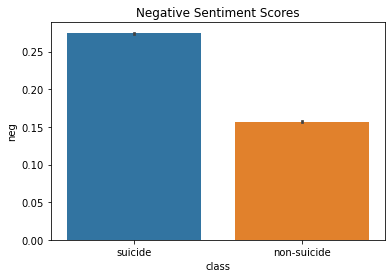

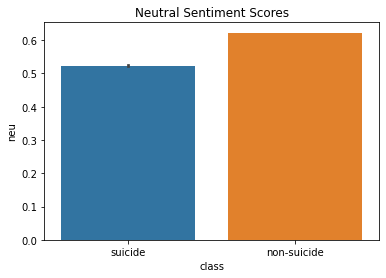

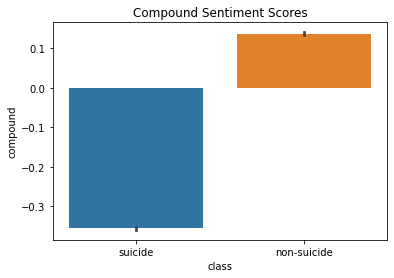

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='class', y='pos', data=df)
plt.title('Positive Sentiment Scores')
plt.show()

sns.barplot(x='class', y='neg', data=df)
plt.title('Negative Sentiment Scores')
plt.show()

sns.barplot(x='class', y='neu', data=df)
plt.title('Neutral Sentiment Scores')
plt.show()

sns.barplot(x='class', y='compound', data=df)
plt.title('Compound Sentiment Scores')
plt.show()


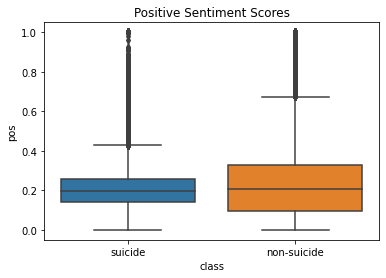

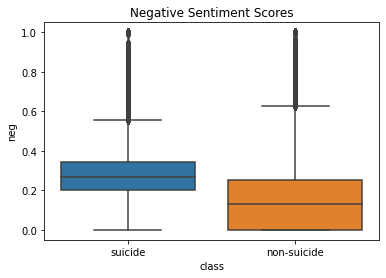

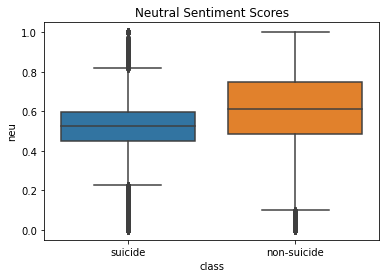

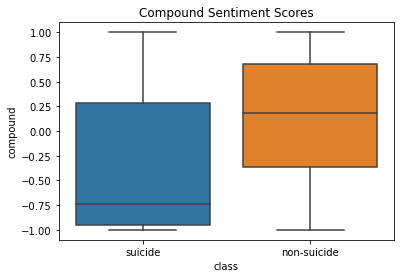

In [10]:
sns.boxplot(x='class', y='pos', data=df)
plt.title('Positive Sentiment Scores')
plt.show()

sns.boxplot(x='class', y='neg', data=df)
plt.title('Negative Sentiment Scores')
plt.show()

sns.boxplot(x='class', y='neu', data=df)
plt.title('Neutral Sentiment Scores')
plt.show()

sns.boxplot(x='class', y='compound', data=df)
plt.title('Compound Sentiment Scores')
plt.show()


In [21]:
# Subset the data by suicide and non-suicide posts
suicide_df = df[df['class'] == 'suicide']
non_suicide_df = df[df['class'] == 'non-suicide']

# Calculate the IQR for each sentiment category separately for suicide and non-suicide posts
suicide_iqr_compound = suicide_df['compound'].quantile(0.75) - suicide_df['compound'].quantile(0.25)

non_suicide_iqr_compound = non_suicide_df['compound'].quantile(0.75) - non_suicide_df['compound'].quantile(0.25)

print(suicide_iqr_compound, non_suicide_iqr_compound)


1.2292999999999998 1.0442


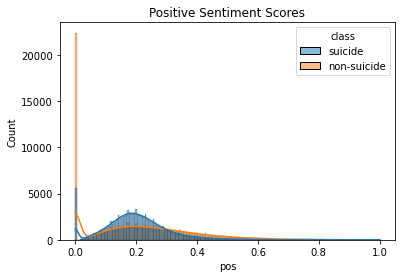

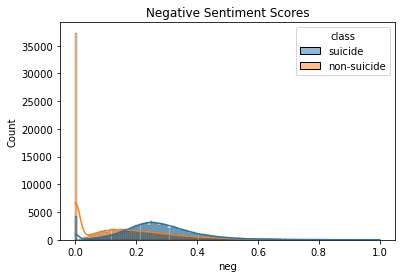

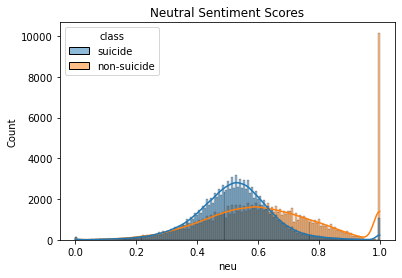

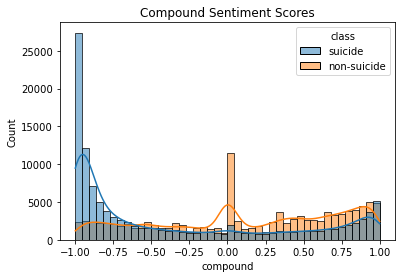

In [11]:
sns.histplot(data=df, x='pos', hue='class', kde=True)
plt.title('Positive Sentiment Scores')
plt.show()

sns.histplot(data=df, x='neg', hue='class', kde=True)
plt.title('Negative Sentiment Scores')
plt.show()

sns.histplot(data=df, x='neu', hue='class', kde=True)
plt.title('Neutral Sentiment Scores')
plt.show()

sns.histplot(data=df, x='compound', hue='class', kde=True)
plt.title('Compound Sentiment Scores')
plt.show()

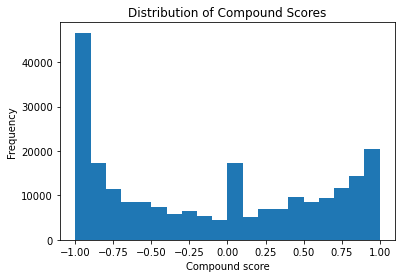

In [12]:
import matplotlib.pyplot as plt

# Create a list of compound scores
compound_scores = df['compound'].tolist()

# Plot a histogram of the compound scores
plt.hist(compound_scores, bins=20)
plt.xlabel('Compound score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores')
plt.show()


#This will create a histogram showing the distribution of compound scores in the dataset. You can then interpret the results to see if the majority of texts are strongly positive or negative. 

In [14]:
df['sentiment_category'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))


C:\Users\Calvin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


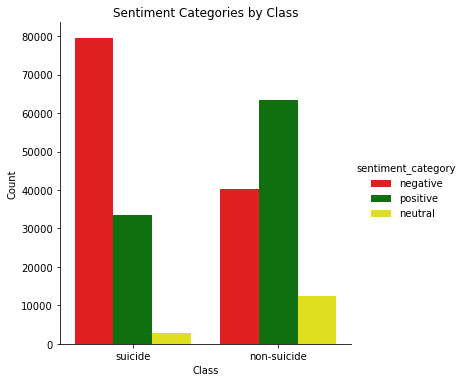

In [15]:
fc = sns.factorplot(x="class", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "red", 
                             "positive": "green", 
                             "neutral": "yellow"})
plt.title('Sentiment Categories by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


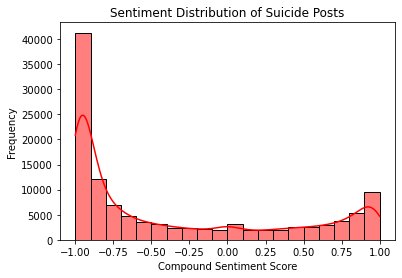

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a subset of the data with suicide posts only
suicide_subset = df[df['class'] == "suicide"]

# create a histogram of compound sentiment scores for the suicide subset
sns.histplot(suicide_subset['compound'], bins=20, kde=True, color='red')

# add a title and axis labels
plt.title("Sentiment Distribution of Suicide Posts")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")

# display the plot
plt.show()


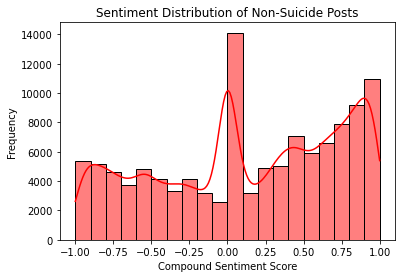

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a subset of the data with suicide posts only
non_suicide_subset = df[df['class'] == "non-suicide"]

# create a histogram of compound sentiment scores for the suicide subset
sns.histplot(non_suicide_subset['compound'], bins=20, kde=True, color='red')

# add a title and axis labels
plt.title("Sentiment Distribution of Non-Suicide Posts")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")

# display the plot
plt.show()


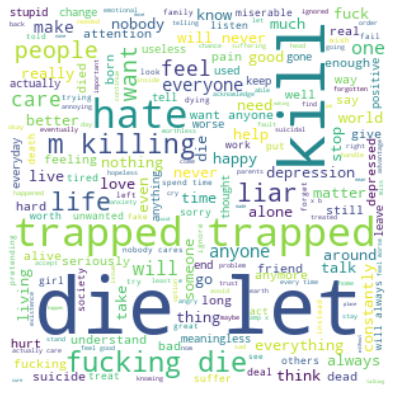

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Subset the data by suicide posts with strongest negative sentiment
strong_suicide_df = df[(df['class'] == 'suicide') & (df['compound'] <= -1)].reset_index(drop=True)

# Concatenate the text of the top 10 posts into a single string
text = ' '.join(strong_suicide_df['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=300, height=300, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


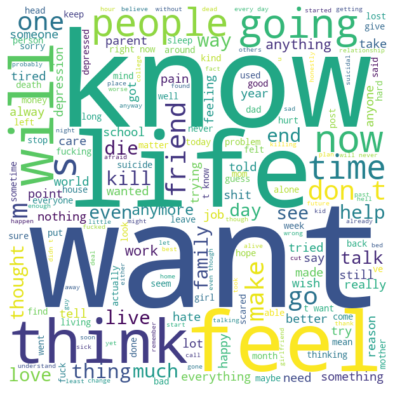

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Subset the data by suicide posts with strongest negative sentiment
strong_suicide_df = df[(df['class'] == 'suicide')].reset_index(drop=True)

# Concatenate the text of the top 10 posts into a single string
text = ' '.join(strong_suicide_df['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
